In [ ]:
#pip install tensorflow_probability==0.8.0rc0 --user --upgrade
#pip install tf-hub-nightly

In [329]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
import os
from re import match
from itertools import product, count, chain
from keras.utils import to_categorical
from tensorflow.keras import layers # replced keras with tensorflow.keras due to this issue 
#"AttributeError: module 'tensorflow' has no attribute 'get_default_graph"
# This occured on layers.Input()
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import string
import numpy as np
from tensorflow.keras.models import load_model

#### Importing Image dataset 

In [169]:
images = os.listdir('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/samples')

In [170]:
images = list(filter(lambda image: match('^[a-z0-9]+\..+$', image), images))

In [171]:
len(images)

1070

In [172]:
texts = [image[0:5] for image in images]

In [173]:
texts

['226md',
 '22d5n',
 '2356g',
 '23mdg',
 '23n88',
 '243mm',
 '244e2',
 '245y5',
 '24f6w',
 '24pew',
 '25257',
 '253dc',
 '25egp',
 '25m6p',
 '25p2m',
 '25w53',
 '264m5',
 '268g2',
 '28348',
 '28x47',
 '2b827',
 '2bg48',
 '2cegf',
 '2cg58',
 '2cgyx',
 '2en7g',
 '2enf4',
 '2fxgd',
 '2g783',
 '2g7nm',
 '2gyb6',
 '2mg87',
 '2mpnn',
 '2n73f',
 '2nbc5',
 '2nbcx',
 '2nf26',
 '2npg6',
 '2nx38',
 '2p2y8',
 '2pfpn',
 '2w4y7',
 '2wc38',
 '2wx73',
 '2x7bm',
 '2xc2n',
 '2ycn8',
 '2yggg',
 '325fb',
 '32cnn',
 '32dnn',
 '33b22',
 '33f7m',
 '33n73',
 '33ng4',
 '33p4e',
 '34b84',
 '34fxm',
 '34pcn',
 '368y5',
 '36bc2',
 '36nx4',
 '36w25',
 '373gb',
 '377xx',
 '378e5',
 '37d52',
 '37ep6',
 '387g2',
 '38n57',
 '3b4we',
 '3bd8f',
 '3bfnd',
 '3bnyf',
 '3bx86',
 '3c7de',
 '3cpwb',
 '3d7bd',
 '3den6',
 '3dgmf',
 '3ebnn',
 '3ebpw',
 '3eny7',
 '3fbxd',
 '3g2w6',
 '3mxdn',
 '3n2b4',
 '3n3cf',
 '3n7mx',
 '3ndxd',
 '3nfdn',
 '3nnpw',
 '3nw7w',
 '3ny45',
 '3p4nn',
 '3p67n',
 '3pe4g',
 '3w2bw',
 '3wnd3',
 '3x325',


### check if all captcha has length of 5

In [174]:
all(len(text)==5 for text in texts)

True

### Finsing the distinct characters from all the captch : Method 1

In [175]:
alphabet = list(frozenset(chain.from_iterable(texts)))
alphabet.sort()
''.join(alphabet)

'2345678bcdefgmnpwxy'

In [176]:
len(alphabet)

19

### Finsing the distinct characters from all the captch: Method 2

In [177]:
tryset = ()
tryset = set(tryset)
for text in texts:
    for i in text:
        tryset.add(i)

In [178]:
tryset = sorted(''.join(tryset))

In [179]:
tryset = ''.join(tryset)

In [180]:
tryset

'2345678bcdefgmnpwxy'

### Assign a unique integer id label for each character in the alphabet


In [181]:
ids =  dict([(ch, tryset.index(ch)) for ch in tryset])

In [182]:
ids

{'2': 0,
 '3': 1,
 '4': 2,
 '5': 3,
 '6': 4,
 '7': 5,
 '8': 6,
 'b': 7,
 'c': 8,
 'd': 9,
 'e': 10,
 'f': 11,
 'g': 12,
 'm': 13,
 'n': 14,
 'p': 15,
 'w': 16,
 'x': 17,
 'y': 18}

### Now we are going to to create a 2D array ('y_labels') of size num images (n) x captcha text size (m)

Where the element ylji
its the integer label for the jth character on the ith captcha image

In [183]:
n,m = len(texts),5
y_labels = np.zeros([n, m], dtype=np.uint8)
images[9]
y_labels.shape

(1070, 5)

In [184]:
texts[9][0]

'2'

In [185]:
y_labels[156][4]

0

In [186]:
for i,j in product(range(0,n), range(0,m)):
    y_labels[i][j] = ids[texts[i][j]]
y_labels[5]

array([ 0,  2,  1, 13, 13], dtype=uint8)

### Now we turn y_labels to a 3D matrix ('y') of size num images x text size x alphabet size.
yji

(y[i, j, :]) is a sparse vector filled by zeros except the element at kth position where k is the integer label of the jth character on the ith captcha image

yji=[ylj,0iylj,1iylj,2i...ylj,si]=[00...1...00]

s
is the alphabet size

In [187]:
y = np.zeros([n, m, len(alphabet)], dtype=np.uint8)
for i, j in product(range(0,n),range(0,m)):
    y[i,j,:] = to_categorical(y_labels[i,j], len(tryset))

In [188]:
y[0,0,:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [189]:
y.shape

(1070, 5, 19)

### We are going to store all the images (grayscaled) in a 4D matrix of size: num images x image height x image width x 1 with float32 dtype with values in the range [0, 1]

In [190]:
import cv2 as cv
import matplotlib.pyplot as plt

In [283]:
X = np.zeros((n,) + (50, 200, 1))
for i, filename in zip(range(0, n), images):
    img = cv2.imread(os.path.join('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/samples/' + filename), cv2.IMREAD_GRAYSCALE)
    assert img.shape == (50, 200)
    X[i, :, :, 0] = img / 255.0

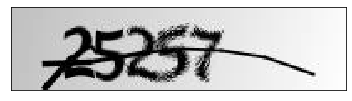

In [311]:
plt.imshow(X[10, :, :, 0], cmap='gray'), plt.xticks([]), plt.yticks([]);

In [286]:
img

array([[192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       ...,
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254]], dtype=uint8)

In [287]:
np.savez_compressed('preprocessed-data.npz', X=X, y=y, y_labels=y_labels, alphabet=alphabet)

# Data After Pre-processing

In [288]:
data = np.load('C:/Users/ankur/Downloads/Kaggle Notebooks/preprocessed-data.npz')

In [289]:
X, y_labels, y = data['X'], data['y_labels'], data['y']

In [290]:
y_labels

array([[ 0,  0,  4, 13,  9],
       [ 0,  0,  9,  3, 14],
       [ 0,  1,  3,  4, 12],
       ...,
       [18, 18,  6,  0,  2],
       [18, 18, 12,  3, 12],
       [18, 18, 14,  3,  5]], dtype=uint8)

In [291]:
y_labels[0]

array([ 0,  0,  4, 13,  9], dtype=uint8)

In [292]:
y_labels[11]

array([0, 3, 1, 9, 8], dtype=uint8)

# Part A : CNN

In [293]:
X.shape

(1070, 50, 200, 1)

In [294]:
y_labels.shape

(1070, 5)

In [295]:
y.shape

(5, 1070, 19)

In [296]:
y = np.reshape(y,(5,1070,19))
y.shape

(5, 1070, 19)

In [297]:
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:,970:]

In [298]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 50, 200, 1)
(100, 50, 200, 1)
(5, 970, 19)
(5, 100, 19)


In [213]:
def preprocess_data():
    n_samples = len(os.listdir('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/samples'))
    print(n_samples)
    X = np.zeros((n_samples, 50, 200, 1)) #1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/samples')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        if len(pic_target) < 6:
            # Scale and reshape image
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            # Define targets and code them using OneHotEncoding
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = tryset.find(l)
                targs[j, ind] = 1
            X[i] = img
            y[:, i] = targs
    
    # Return final data
    return X, y

X, y = preprocess_data()
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

1070


In [ ]:
print(X.shape)
print(y.shape)

In [316]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [317]:
model=create_model();
model.summary();

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 50, 200, 16)  160         input_14[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_40 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_40[0][0]                  
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_40[0][0]           
____________________________________________________________________________________________

In [318]:
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Train on 776 samples, validate on 194 samples
Epoch 1/30
776/776 [==============================] - 7s 9ms/sample - loss: 14.9638 - dense_131_loss: 2.9125 - dense_133_loss: 3.0201 - dense_135_loss: 3.0073 - dense_137_loss: 3.0180 - dense_139_loss: 2.9953 - dense_131_accuracy: 0.0838 - dense_133_accuracy: 0.0683 - dense_135_accuracy: 0.0683 - dense_137_accuracy: 0.0747 - dense_139_accuracy: 0.0567 - val_loss: 14.8874 - val_dense_131_loss: 3.1158 - val_dense_133_loss: 2.9487 - val_dense_135_loss: 2.9392 - val_dense_137_loss: 2.9463 - val_dense_139_loss: 2.9527 - val_dense_131_accuracy: 0.0000e+00 - val_dense_133_accuracy: 0.0773 - val_dense_135_accuracy: 0.0670 - val_dense_137_accuracy: 0.0361 - val_dense_139_accuracy: 0.0567
Epoch 2/30
776/776 [==============================] - 5s 6ms/sample - loss: 14.3541 - dense_131_loss: 2.7178 - dense_133_loss: 2.8668 - dense_135_loss: 2.9158 - dense_137_loss: 2.9154 - dense_139_loss: 2.9257 - dense_131_accuracy: 0.0979 - dense_133_accuracy: 0.0966

Epoch 13/30
776/776 [==============================] - 5s 7ms/sample - loss: 6.0909 - dense_131_loss: 0.4762 - dense_133_loss: 1.0921 - dense_135_loss: 1.2718 - dense_137_loss: 1.6236 - dense_139_loss: 1.6343 - dense_131_accuracy: 0.8389 - dense_133_accuracy: 0.6469 - dense_135_accuracy: 0.5683 - dense_137_accuracy: 0.4665 - dense_139_accuracy: 0.4201 - val_loss: 12.0120 - val_dense_131_loss: 4.3907 - val_dense_133_loss: 1.6690 - val_dense_135_loss: 1.7638 - val_dense_137_loss: 2.0697 - val_dense_139_loss: 2.2013 - val_dense_131_accuracy: 0.0103 - val_dense_133_accuracy: 0.7680 - val_dense_135_accuracy: 0.6907 - val_dense_137_accuracy: 0.5361 - val_dense_139_accuracy: 0.5928
Epoch 14/30
776/776 [==============================] - 5s 6ms/sample - loss: 5.3653 - dense_131_loss: 0.4042 - dense_133_loss: 0.9061 - dense_135_loss: 1.1115 - dense_137_loss: 1.4492 - dense_139_loss: 1.4526 - dense_131_accuracy: 0.8621 - dense_133_accuracy: 0.7010 - dense_135_accuracy: 0.5941 - dense_137_accuracy

Epoch 25/30
776/776 [==============================] - 5s 6ms/sample - loss: 2.0039 - dense_131_loss: 0.1276 - dense_133_loss: 0.3629 - dense_135_loss: 0.4342 - dense_137_loss: 0.5707 - dense_139_loss: 0.5205 - dense_131_accuracy: 0.9562 - dense_133_accuracy: 0.8711 - dense_135_accuracy: 0.8724 - dense_137_accuracy: 0.8170 - dense_139_accuracy: 0.8157 - val_loss: 13.0380 - val_dense_131_loss: 10.4719 - val_dense_133_loss: 0.6515 - val_dense_135_loss: 0.6713 - val_dense_137_loss: 0.7578 - val_dense_139_loss: 0.6590 - val_dense_131_accuracy: 0.0206 - val_dense_133_accuracy: 0.8608 - val_dense_135_accuracy: 0.7887 - val_dense_137_accuracy: 0.7990 - val_dense_139_accuracy: 0.8144
Epoch 26/30
776/776 [==============================] - 5s 7ms/sample - loss: 2.0120 - dense_131_loss: 0.1486 - dense_133_loss: 0.3166 - dense_135_loss: 0.4134 - dense_137_loss: 0.6022 - dense_139_loss: 0.5319 - dense_131_accuracy: 0.9433 - dense_133_accuracy: 0.8905 - dense_135_accuracy: 0.8492 - dense_137_accurac

In [319]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 19))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += tryset[l]
    return capt#, sum(probs) / 5

In [320]:
score= model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', score)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [321]:
# Check model on some samples
model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print(predict('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/8n5p3.png'))
print(predict('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/f2m8n.png'))
print(predict('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/dce8y.png'))
print(predict('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/3eny7.png'))
print(predict('C:/Users/ankur/Downloads/Kaggle Notebooks/captcha-version-2-images/samples/npxb7.png'))

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Part B: Activation Function

In [330]:
from tensorflow.keras.layers import LeakyReLU

## 1. Using Relu and Softmax Activation Functions

In [342]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def act_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation=LeakyReLU(alpha=0.1))(img)
    #model.add(LeakyReLU(alpha=0.05))
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation=LeakyReLU(alpha=0.1))(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation=LeakyReLU(alpha=0.1))(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation=LeakyReLU(alpha=0.1))(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [343]:
model=act_create_model();
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 50, 200, 16)  160         input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_50 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_53[0][0]                  
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_50[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 5s 7ms/sample - loss: 9.0405 - dense_161_loss: 1.2387 - dense_163_loss: 1.7636 - dense_165_loss: 1.9369 - dense_167_loss: 1.9926 - dense_169_loss: 2.1011 - dense_161_accuracy: 0.6392 - dense_163_accuracy: 0.5142 - dense_165_accuracy: 0.4755 - dense_167_accuracy: 0.4253 - dense_169_accuracy: 0.4162 - val_loss: 13.5080 - val_dense_161_loss: 2.7367 - val_dense_163_loss: 2.6663 - val_dense_165_loss: 2.7024 - val_dense_167_loss: 2.7147 - val_dense_169_loss: 2.7048 - val_dense_161_accuracy: 0.4278 - val_dense_163_accuracy: 0.4485 - val_dense_165_accuracy: 0.4021 - val_dense_167_accuracy: 0.4175 - val_dense_169_accuracy: 0.2732
Epoch 6/30
776/776 [==============================] - 6s 8ms/sample - loss: 7.3511 - dense_161_loss: 0.8979 - dense_163_loss: 1.4053 - dense_165_loss: 1.5576 - dense_167_loss: 1.6893 - dense_169_loss: 1.8106 - dense_161_accuracy: 0.7539 - dense_163_accuracy: 0.6289 - dense_165_accuracy: 0.5722 - dense_167_accuracy: 0.4884 - de

776/776 [==============================] - 8s 11ms/sample - loss: 1.1470 - dense_161_loss: 0.0996 - dense_163_loss: 0.1842 - dense_165_loss: 0.2441 - dense_167_loss: 0.3117 - dense_169_loss: 0.2977 - dense_161_accuracy: 0.9729 - dense_163_accuracy: 0.9562 - dense_165_accuracy: 0.9317 - dense_167_accuracy: 0.9149 - dense_169_accuracy: 0.9149 - val_loss: 6.5459 - val_dense_161_loss: 3.2580 - val_dense_163_loss: 0.6724 - val_dense_165_loss: 0.8780 - val_dense_167_loss: 0.9512 - val_dense_169_loss: 0.8787 - val_dense_161_accuracy: 0.3608 - val_dense_163_accuracy: 0.8660 - val_dense_165_accuracy: 0.7784 - val_dense_167_accuracy: 0.7990 - val_dense_169_accuracy: 0.8144
Epoch 18/30
776/776 [==============================] - 6s 8ms/sample - loss: 0.9672 - dense_161_loss: 0.0830 - dense_163_loss: 0.1569 - dense_165_loss: 0.2154 - dense_167_loss: 0.2328 - dense_169_loss: 0.2736 - dense_161_accuracy: 0.9755 - dense_163_accuracy: 0.9613 - dense_165_accuracy: 0.9459 - dense_167_accuracy: 0.9381 - d

776/776 [==============================] - 5s 7ms/sample - loss: 0.4207 - dense_161_loss: 0.0416 - dense_163_loss: 0.0608 - dense_165_loss: 0.0827 - dense_167_loss: 0.1308 - dense_169_loss: 0.0985 - dense_161_accuracy: 0.9897 - dense_163_accuracy: 0.9794 - dense_165_accuracy: 0.9742 - dense_167_accuracy: 0.9601 - dense_169_accuracy: 0.9652 - val_loss: 12.6938 - val_dense_161_loss: 9.8665 - val_dense_163_loss: 1.0866 - val_dense_165_loss: 0.8342 - val_dense_167_loss: 0.7212 - val_dense_169_loss: 0.6229 - val_dense_161_accuracy: 0.1340 - val_dense_163_accuracy: 0.8918 - val_dense_165_accuracy: 0.8144 - val_dense_167_accuracy: 0.8196 - val_dense_169_accuracy: 0.8660
Epoch 30/30
776/776 [==============================] - 6s 7ms/sample - loss: 0.3909 - dense_161_loss: 0.0306 - dense_163_loss: 0.0844 - dense_165_loss: 0.0797 - dense_167_loss: 0.0977 - dense_169_loss: 0.0946 - dense_161_accuracy: 0.9948 - dense_163_accuracy: 0.9755 - dense_165_accuracy: 0.9781 - dense_167_accuracy: 0.9768 - d

In [337]:
score= model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', score)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## 2. Using Tanh and Relu

In [339]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def act_2_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='tanh')(img)
    #model.add(LeakyReLU(alpha=0.05))
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='tanh')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='tanh')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='tanh')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [340]:
model=act_2_create_model();
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 50, 200, 16)  160         input_21[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_47 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_50[0][0]                  
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_47[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 7s 8ms/sample - loss: 14.6842 - dense_151_loss: 2.7192 - dense_153_loss: 3.0212 - dense_155_loss: 2.9685 - dense_157_loss: 2.9864 - dense_159_loss: 2.9650 - dense_151_accuracy: 0.0902 - dense_153_accuracy: 0.0593 - dense_155_accuracy: 0.0876 - dense_157_accuracy: 0.0709 - dense_159_accuracy: 0.1018 - val_loss: 18.2396 - val_dense_151_loss: 6.5404 - val_dense_153_loss: 2.9259 - val_dense_155_loss: 2.9529 - val_dense_157_loss: 2.9813 - val_dense_159_loss: 2.9594 - val_dense_151_accuracy: 0.0000e+00 - val_dense_153_accuracy: 0.0773 - val_dense_155_accuracy: 0.0979 - val_dense_157_accuracy: 0.0979 - val_dense_159_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 7s 9ms/sample - loss: 14.5635 - dense_151_loss: 2.7007 - dense_153_loss: 2.9762 - dense_155_loss: 2.9628 - dense_157_loss: 2.9702 - dense_159_loss: 2.9357 - dense_151_accuracy: 0.0799 - dense_153_accuracy: 0.0747 - dense_155_accuracy: 0.0902 - dense_157_accuracy: 0.083

Epoch 17/30
776/776 [==============================] - 5s 7ms/sample - loss: 14.4827 - dense_151_loss: 2.6998 - dense_153_loss: 2.9302 - dense_155_loss: 2.9414 - dense_157_loss: 2.9530 - dense_159_loss: 2.9643 - dense_151_accuracy: 0.0786 - dense_153_accuracy: 0.0941 - dense_155_accuracy: 0.0954 - dense_157_accuracy: 0.0747 - dense_159_accuracy: 0.0954 - val_loss: 19.3225 - val_dense_151_loss: 7.7729 - val_dense_153_loss: 2.9168 - val_dense_155_loss: 2.9408 - val_dense_157_loss: 2.9536 - val_dense_159_loss: 2.9468 - val_dense_151_accuracy: 0.0000e+00 - val_dense_153_accuracy: 0.0773 - val_dense_155_accuracy: 0.0979 - val_dense_157_accuracy: 0.0979 - val_dense_159_accuracy: 0.1392
Epoch 18/30
776/776 [==============================] - 5s 7ms/sample - loss: 14.4479 - dense_151_loss: 2.6808 - dense_153_loss: 2.9107 - dense_155_loss: 2.9520 - dense_157_loss: 2.9522 - dense_159_loss: 2.9504 - dense_151_accuracy: 0.0838 - dense_153_accuracy: 0.0863 - dense_155_accuracy: 0.0954 - dense_157_ac

Epoch 29/30
776/776 [==============================] - 5s 7ms/sample - loss: 14.4184 - dense_151_loss: 2.6705 - dense_153_loss: 2.9123 - dense_155_loss: 2.9474 - dense_157_loss: 2.9521 - dense_159_loss: 2.9288 - dense_151_accuracy: 0.0876 - dense_153_accuracy: 0.1057 - dense_155_accuracy: 0.0902 - dense_157_accuracy: 0.0979 - dense_159_accuracy: 0.1018 - val_loss: 19.6960 - val_dense_151_loss: 8.2182 - val_dense_153_loss: 2.8979 - val_dense_155_loss: 2.9437 - val_dense_157_loss: 2.9508 - val_dense_159_loss: 2.9538 - val_dense_151_accuracy: 0.0000e+00 - val_dense_153_accuracy: 0.0773 - val_dense_155_accuracy: 0.0979 - val_dense_157_accuracy: 0.0979 - val_dense_159_accuracy: 0.1392
Epoch 30/30
776/776 [==============================] - 6s 7ms/sample - loss: 14.4051 - dense_151_loss: 2.6912 - dense_153_loss: 2.9011 - dense_155_loss: 2.9376 - dense_157_loss: 2.9408 - dense_159_loss: 2.9320 - dense_151_accuracy: 0.0683 - dense_153_accuracy: 0.0992 - dense_155_accuracy: 0.0954 - dense_157_ac

In [341]:
score= model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', score)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Tanh has decreased the accuracy drastically

# Part c: Cost Function

Loss function is usually a function defined on a data point, prediction and label, and measures the penalty. For example:

    square loss l(f(xi|θ),yi)=(f(xi|θ)−yi)2

, used in linear regression
hinge loss l(f(xi|θ),yi)=max(0,1−f(xi|θ)yi)
, used in SVM
0/1 loss l(f(xi|θ),yi)=1⟺f(xi|θ)≠yi

    , used in theoretical analysis and definition of accuracy

Cost function is usually more general. It might be a sum of loss functions over your training set plus some model complexity penalty (regularization). For example:

    Mean Squared Error MSE(θ)=1N∑Ni=1(f(xi|θ)−yi)2

SVM cost function SVM(θ)=∥θ∥2+C∑Ni=1ξi
(there are additional constraints connecting ξi with C and with training set)

### Plotting Loss Function

In [ ]:
plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the model
train_acc = model.evaluate(trainX, trainy, verbose=0)
test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [344]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def cost_create_model(cost_function):
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='tanh')(img)
    #model.add(LeakyReLU(alpha=0.05))
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='tanh')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='tanh')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='tanh')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss=cost_function, optimizer='adam',metrics=["accuracy"])
    return model

In [345]:
# Passing 'categorical_crossentropy' cost_function 
model=cost_create_model('categorical_crossentropy');
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 50, 200, 16)  160         input_23[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_53 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_56[0][0]                  
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_53[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 5s 6ms/sample - loss: 14.6356 - dense_171_loss: 2.7105 - dense_173_loss: 2.9676 - dense_175_loss: 3.0085 - dense_177_loss: 2.9609 - dense_179_loss: 2.9831 - dense_171_accuracy: 0.0902 - dense_173_accuracy: 0.1057 - dense_175_accuracy: 0.0876 - dense_177_accuracy: 0.0838 - dense_179_accuracy: 0.0825 - val_loss: 18.1069 - val_dense_171_loss: 6.5748 - val_dense_173_loss: 2.9364 - val_dense_175_loss: 2.9464 - val_dense_177_loss: 2.9601 - val_dense_179_loss: 2.9470 - val_dense_171_accuracy: 0.0000e+00 - val_dense_173_accuracy: 0.0773 - val_dense_175_accuracy: 0.0979 - val_dense_177_accuracy: 0.0979 - val_dense_179_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 5s 6ms/sample - loss: 14.5829 - dense_171_loss: 2.6897 - dense_173_loss: 2.9713 - dense_175_loss: 2.9591 - dense_177_loss: 2.9838 - dense_179_loss: 2.9774 - dense_171_accuracy: 0.1018 - dense_173_accuracy: 0.1057 - dense_175_accuracy: 0.0876 - dense_177_accuracy: 0.087

Epoch 17/30
776/776 [==============================] - 5s 6ms/sample - loss: 14.4471 - dense_171_loss: 2.6881 - dense_173_loss: 2.9364 - dense_175_loss: 2.9493 - dense_177_loss: 2.9308 - dense_179_loss: 2.9384 - dense_171_accuracy: 0.0863 - dense_173_accuracy: 0.1031 - dense_175_accuracy: 0.0825 - dense_177_accuracy: 0.0954 - dense_179_accuracy: 0.0954 - val_loss: 19.1840 - val_dense_171_loss: 7.7299 - val_dense_173_loss: 2.9371 - val_dense_175_loss: 2.9474 - val_dense_177_loss: 2.9331 - val_dense_179_loss: 2.9578 - val_dense_171_accuracy: 0.0000e+00 - val_dense_173_accuracy: 0.0773 - val_dense_175_accuracy: 0.0979 - val_dense_177_accuracy: 0.0979 - val_dense_179_accuracy: 0.1392
Epoch 18/30
776/776 [==============================] - 5s 6ms/sample - loss: 14.4494 - dense_171_loss: 2.6786 - dense_173_loss: 2.9397 - dense_175_loss: 2.9545 - dense_177_loss: 2.9277 - dense_179_loss: 2.9484 - dense_171_accuracy: 0.0696 - dense_173_accuracy: 0.1044 - dense_175_accuracy: 0.0851 - dense_177_ac

Epoch 29/30
776/776 [==============================] - 7s 8ms/sample - loss: 14.4086 - dense_171_loss: 2.6830 - dense_173_loss: 2.9416 - dense_175_loss: 2.9334 - dense_177_loss: 2.9085 - dense_179_loss: 2.9396 - dense_171_accuracy: 0.0631 - dense_173_accuracy: 0.1044 - dense_175_accuracy: 0.0941 - dense_177_accuracy: 0.0966 - dense_179_accuracy: 0.1057 - val_loss: 19.5609 - val_dense_171_loss: 8.1900 - val_dense_173_loss: 2.9373 - val_dense_175_loss: 2.9405 - val_dense_177_loss: 2.9090 - val_dense_179_loss: 2.9495 - val_dense_171_accuracy: 0.0000e+00 - val_dense_173_accuracy: 0.0773 - val_dense_175_accuracy: 0.0979 - val_dense_177_accuracy: 0.0979 - val_dense_179_accuracy: 0.1392
Epoch 30/30
776/776 [==============================] - 6s 8ms/sample - loss: 14.3937 - dense_171_loss: 2.6868 - dense_173_loss: 2.9419 - dense_175_loss: 2.9307 - dense_177_loss: 2.8983 - dense_179_loss: 2.9395 - dense_171_accuracy: 0.0760 - dense_173_accuracy: 0.1031 - dense_175_accuracy: 0.0928 - dense_177_ac

In [346]:
# Passing 'kullback_leibler_divergence' cost_function 
model=cost_create_model('kullback_leibler_divergence');
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 50, 200, 16)  160         input_24[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_56 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_56[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 5s 6ms/sample - loss: 0.2642 - dense_181_loss: 0.0450 - dense_183_loss: 0.0570 - dense_185_loss: 0.0591 - dense_187_loss: 0.0574 - dense_189_loss: 0.0452 - dense_181_accuracy: 0.0631 - dense_183_accuracy: 0.0580 - dense_185_accuracy: 0.0451 - dense_187_accuracy: 0.0657 - dense_189_accuracy: 0.0580 - val_loss: 0.2479 - val_dense_181_loss: 0.2083 - val_dense_183_loss: 0.0276 - val_dense_185_loss: 0.0281 - val_dense_187_loss: 0.0270 - val_dense_189_loss: 0.0227 - val_dense_181_accuracy: 0.0000e+00 - val_dense_183_accuracy: 0.0464 - val_dense_185_accuracy: 0.0258 - val_dense_187_accuracy: 0.0979 - val_dense_189_accuracy: 0.0722
Epoch 6/30
776/776 [==============================] - 4s 6ms/sample - loss: 0.2065 - dense_181_loss: 0.0375 - dense_183_loss: 0.0422 - dense_185_loss: 0.0493 - dense_187_loss: 0.0457 - dense_189_loss: 0.0308 - dense_181_accuracy: 0.0722 - dense_183_accuracy: 0.0631 - dense_185_accuracy: 0.0438 - dense_187_accuracy: 0.0631 -

Epoch 17/30
776/776 [==============================] - 5s 6ms/sample - loss: 0.0451 - dense_181_loss: 0.0089 - dense_183_loss: 0.0093 - dense_185_loss: 0.0087 - dense_187_loss: 0.0103 - dense_189_loss: 0.0076 - dense_181_accuracy: 0.0644 - dense_183_accuracy: 0.0515 - dense_185_accuracy: 0.0374 - dense_187_accuracy: 0.0670 - dense_189_accuracy: 0.0593 - val_loss: 0.0507 - val_dense_181_loss: 0.0462 - val_dense_183_loss: 0.0041 - val_dense_185_loss: 0.0038 - val_dense_187_loss: 0.0036 - val_dense_189_loss: 0.0032 - val_dense_181_accuracy: 0.0000e+00 - val_dense_183_accuracy: 0.0464 - val_dense_185_accuracy: 0.0464 - val_dense_187_accuracy: 0.0979 - val_dense_189_accuracy: 0.0722
Epoch 18/30
776/776 [==============================] - 5s 6ms/sample - loss: 0.0394 - dense_181_loss: 0.0077 - dense_183_loss: 0.0075 - dense_185_loss: 0.0087 - dense_187_loss: 0.0082 - dense_189_loss: 0.0070 - dense_181_accuracy: 0.0773 - dense_183_accuracy: 0.0477 - dense_185_accuracy: 0.0606 - dense_187_accur

Epoch 29/30
776/776 [==============================] - 5s 6ms/sample - loss: 0.0183 - dense_181_loss: 0.0035 - dense_183_loss: 0.0039 - dense_185_loss: 0.0041 - dense_187_loss: 0.0036 - dense_189_loss: 0.0031 - dense_181_accuracy: 0.0825 - dense_183_accuracy: 0.0503 - dense_185_accuracy: 0.0451 - dense_187_accuracy: 0.0593 - dense_189_accuracy: 0.0683 - val_loss: 0.0229 - val_dense_181_loss: 0.0205 - val_dense_183_loss: 0.0016 - val_dense_185_loss: 0.0015 - val_dense_187_loss: 0.0015 - val_dense_189_loss: 0.0013 - val_dense_181_accuracy: 0.0000e+00 - val_dense_183_accuracy: 0.0464 - val_dense_185_accuracy: 0.0464 - val_dense_187_accuracy: 0.0979 - val_dense_189_accuracy: 0.0722
Epoch 30/30
776/776 [==============================] - 4s 6ms/sample - loss: 0.0178 - dense_181_loss: 0.0044 - dense_183_loss: 0.0033 - dense_185_loss: 0.0034 - dense_187_loss: 0.0037 - dense_189_loss: 0.0033 - dense_181_accuracy: 0.0606 - dense_183_accuracy: 0.0528 - dense_185_accuracy: 0.0503 - dense_187_accur

In [348]:
# Passing 'cosine_proximity' cost_function 
cosine_proximity = tf.keras.losses.CosineSimilarity(axis=1)
model=cost_create_model(cosine_proximity);
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 50, 200, 16)  160         input_26[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_62 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_65[0][0]                  
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_62[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 5s 6ms/sample - loss: -1.1722 - dense_201_loss: -0.2621 - dense_203_loss: -0.2304 - dense_205_loss: -0.2260 - dense_207_loss: -0.2245 - dense_209_loss: -0.2265 - dense_201_accuracy: 0.0773 - dense_203_accuracy: 0.0760 - dense_205_accuracy: 0.0606 - dense_207_accuracy: 0.0915 - dense_209_accuracy: 0.0863 - val_loss: -0.9289 - val_dense_201_loss: -0.0129 - val_dense_203_loss: -0.2348 - val_dense_205_loss: -0.2272 - val_dense_207_loss: -0.2255 - val_dense_209_loss: -0.2272 - val_dense_201_accuracy: 0.0000e+00 - val_dense_203_accuracy: 0.0515 - val_dense_205_accuracy: 0.0979 - val_dense_207_accuracy: 0.0979 - val_dense_209_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 4s 6ms/sample - loss: -1.1787 - dense_201_loss: -0.2611 - dense_203_loss: -0.2318 - dense_205_loss: -0.2291 - dense_207_loss: -0.2259 - dense_209_loss: -0.2293 - dense_201_accuracy: 0.0747 - dense_203_accuracy: 0.0838 - dense_205_accuracy: 0.0889 - dense_207_

Epoch 17/30
776/776 [==============================] - 5s 7ms/sample - loss: -1.1980 - dense_201_loss: -0.2626 - dense_203_loss: -0.2378 - dense_205_loss: -0.2351 - dense_207_loss: -0.2292 - dense_209_loss: -0.2316 - dense_201_accuracy: 0.0786 - dense_203_accuracy: 0.0838 - dense_205_accuracy: 0.0928 - dense_207_accuracy: 0.1057 - dense_209_accuracy: 0.0979 - val_loss: -0.9466 - val_dense_201_loss: -0.0074 - val_dense_203_loss: -0.2463 - val_dense_205_loss: -0.2353 - val_dense_207_loss: -0.2263 - val_dense_209_loss: -0.2281 - val_dense_201_accuracy: 0.0000e+00 - val_dense_203_accuracy: 0.0773 - val_dense_205_accuracy: 0.0979 - val_dense_207_accuracy: 0.0979 - val_dense_209_accuracy: 0.1392
Epoch 18/30
776/776 [==============================] - 5s 6ms/sample - loss: -1.1983 - dense_201_loss: -0.2620 - dense_203_loss: -0.2415 - dense_205_loss: -0.2327 - dense_207_loss: -0.2293 - dense_209_loss: -0.2315 - dense_201_accuracy: 0.0760 - dense_203_accuracy: 0.1044 - dense_205_accuracy: 0.1070

Epoch 29/30
776/776 [==============================] - 5s 6ms/sample - loss: -1.2126 - dense_201_loss: -0.2640 - dense_203_loss: -0.2485 - dense_205_loss: -0.2381 - dense_207_loss: -0.2291 - dense_209_loss: -0.2318 - dense_201_accuracy: 0.0889 - dense_203_accuracy: 0.1147 - dense_205_accuracy: 0.1005 - dense_207_accuracy: 0.0812 - dense_209_accuracy: 0.1070 - val_loss: -0.9625 - val_dense_201_loss: -0.0068 - val_dense_203_loss: -0.2605 - val_dense_205_loss: -0.2363 - val_dense_207_loss: -0.2280 - val_dense_209_loss: -0.2270 - val_dense_201_accuracy: 0.0000e+00 - val_dense_203_accuracy: 0.0773 - val_dense_205_accuracy: 0.0979 - val_dense_207_accuracy: 0.0979 - val_dense_209_accuracy: 0.1392
Epoch 30/30
776/776 [==============================] - 5s 6ms/sample - loss: -1.2117 - dense_201_loss: -0.2625 - dense_203_loss: -0.2473 - dense_205_loss: -0.2402 - dense_207_loss: -0.2301 - dense_209_loss: -0.2317 - dense_201_accuracy: 0.0786 - dense_203_accuracy: 0.1108 - dense_205_accuracy: 0.0979

# Part D : Epochs

### 1. Decreasing the number of epochs to 10

In [349]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [350]:
model=create_model();
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=10,verbose=1, validation_split=0.2)

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 50, 200, 16)  160         input_27[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_65 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_68[0][0]                  
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_65[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 4s 6ms/sample - loss: 12.5964 - dense_211_loss: 2.1731 - dense_213_loss: 2.5271 - dense_215_loss: 2.5455 - dense_217_loss: 2.7168 - dense_219_loss: 2.6253 - dense_211_accuracy: 0.2771 - dense_213_accuracy: 0.2139 - dense_215_accuracy: 0.2049 - dense_217_accuracy: 0.1778 - dense_219_accuracy: 0.1727 - val_loss: 14.6571 - val_dense_211_loss: 3.1577 - val_dense_213_loss: 2.8557 - val_dense_215_loss: 2.8704 - val_dense_217_loss: 2.9020 - val_dense_219_loss: 2.9098 - val_dense_211_accuracy: 0.0000e+00 - val_dense_213_accuracy: 0.3144 - val_dense_215_accuracy: 0.2526 - val_dense_217_accuracy: 0.2216 - val_dense_219_accuracy: 0.2371
Epoch 6/10
776/776 [==============================] - 5s 7ms/sample - loss: 11.6522 - dense_211_loss: 1.9594 - dense_213_loss: 2.3212 - dense_215_loss: 2.3568 - dense_217_loss: 2.5343 - dense_219_loss: 2.4723 - dense_211_accuracy: 0.3827 - dense_213_accuracy: 0.2938 - dense_215_accuracy: 0.2964 - dense_217_accuracy: 0.215

### 2. Increasing the number of epochs to 50

In [351]:
model=create_model();
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=50,verbose=1, validation_split=0.2)

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 50, 200, 16)  160         input_28[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_68 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_71[0][0]                  
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_68[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 5s 6ms/sample - loss: 13.5297 - dense_221_loss: 2.3606 - dense_223_loss: 2.7498 - dense_225_loss: 2.7326 - dense_227_loss: 2.8593 - dense_229_loss: 2.8228 - dense_221_accuracy: 0.1946 - dense_223_accuracy: 0.1263 - dense_225_accuracy: 0.1392 - dense_227_accuracy: 0.0825 - dense_229_accuracy: 0.1379 - val_loss: 14.8757 - val_dense_221_loss: 3.2417 - val_dense_223_loss: 2.8864 - val_dense_225_loss: 2.8929 - val_dense_227_loss: 2.9343 - val_dense_229_loss: 2.9118 - val_dense_221_accuracy: 0.0000e+00 - val_dense_223_accuracy: 0.1237 - val_dense_225_accuracy: 0.1082 - val_dense_227_accuracy: 0.0979 - val_dense_229_accuracy: 0.1649
Epoch 6/50
776/776 [==============================] - 5s 6ms/sample - loss: 13.1593 - dense_221_loss: 2.1909 - dense_223_loss: 2.6928 - dense_225_loss: 2.6689 - dense_227_loss: 2.8364 - dense_229_loss: 2.7819 - dense_221_accuracy: 0.1997 - dense_223_accuracy: 0.1469 - dense_225_accuracy: 0.1353 - dense_227_accuracy: 0.086

Epoch 17/50
776/776 [==============================] - 5s 6ms/sample - loss: 6.0284 - dense_221_loss: 0.4680 - dense_223_loss: 0.9627 - dense_225_loss: 1.3746 - dense_227_loss: 1.7061 - dense_229_loss: 1.4888 - dense_221_accuracy: 0.8454 - dense_223_accuracy: 0.6469 - dense_225_accuracy: 0.5180 - dense_227_accuracy: 0.3943 - dense_229_accuracy: 0.4807 - val_loss: 12.1275 - val_dense_221_loss: 7.1003 - val_dense_223_loss: 0.9383 - val_dense_225_loss: 1.5271 - val_dense_227_loss: 1.7608 - val_dense_229_loss: 1.5216 - val_dense_221_accuracy: 0.0103 - val_dense_223_accuracy: 0.7938 - val_dense_225_accuracy: 0.6443 - val_dense_227_accuracy: 0.5876 - val_dense_229_accuracy: 0.6082
Epoch 18/50
776/776 [==============================] - 5s 6ms/sample - loss: 5.4104 - dense_221_loss: 0.4489 - dense_223_loss: 0.8591 - dense_225_loss: 1.1936 - dense_227_loss: 1.5104 - dense_229_loss: 1.4178 - dense_221_accuracy: 0.8286 - dense_223_accuracy: 0.6830 - dense_225_accuracy: 0.5825 - dense_227_accuracy

Epoch 29/50
776/776 [==============================] - 5s 6ms/sample - loss: 2.4172 - dense_221_loss: 0.1810 - dense_223_loss: 0.3488 - dense_225_loss: 0.5356 - dense_227_loss: 0.7558 - dense_229_loss: 0.5707 - dense_221_accuracy: 0.9265 - dense_223_accuracy: 0.8582 - dense_225_accuracy: 0.7745 - dense_227_accuracy: 0.6946 - dense_229_accuracy: 0.7925 - val_loss: 13.7718 - val_dense_221_loss: 11.5839 - val_dense_223_loss: 0.5571 - val_dense_225_loss: 0.7185 - val_dense_227_loss: 0.7064 - val_dense_229_loss: 0.6626 - val_dense_221_accuracy: 0.0258 - val_dense_223_accuracy: 0.8454 - val_dense_225_accuracy: 0.7887 - val_dense_227_accuracy: 0.7680 - val_dense_229_accuracy: 0.7990
Epoch 30/50
776/776 [==============================] - 5s 6ms/sample - loss: 2.3457 - dense_221_loss: 0.1704 - dense_223_loss: 0.3548 - dense_225_loss: 0.4836 - dense_227_loss: 0.7850 - dense_229_loss: 0.5446 - dense_221_accuracy: 0.9265 - dense_223_accuracy: 0.8698 - dense_225_accuracy: 0.8183 - dense_227_accurac

776/776 [==============================] - 5s 6ms/sample - loss: 1.5121 - dense_221_loss: 0.0924 - dense_223_loss: 0.2611 - dense_225_loss: 0.3259 - dense_227_loss: 0.5402 - dense_229_loss: 0.2740 - dense_221_accuracy: 0.9652 - dense_223_accuracy: 0.8892 - dense_225_accuracy: 0.8634 - dense_227_accuracy: 0.7784 - dense_229_accuracy: 0.8853 - val_loss: nan - val_dense_221_loss: nan - val_dense_223_loss: 0.6347 - val_dense_225_loss: 0.8074 - val_dense_227_loss: 0.6076 - val_dense_229_loss: 0.5259 - val_dense_221_accuracy: 0.0619 - val_dense_223_accuracy: 0.8763 - val_dense_225_accuracy: 0.7990 - val_dense_227_accuracy: 0.8041 - val_dense_229_accuracy: 0.8608
Epoch 42/50
776/776 [==============================] - 5s 6ms/sample - loss: 1.4136 - dense_221_loss: 0.1023 - dense_223_loss: 0.1901 - dense_225_loss: 0.3517 - dense_227_loss: 0.4783 - dense_229_loss: 0.3012 - dense_221_accuracy: 0.9678 - dense_223_accuracy: 0.9201 - dense_225_accuracy: 0.8647 - dense_227_accuracy: 0.8067 - dense_22

# Part E : Gradient Estimation

In [354]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def grad_create_model(gradient_est):
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer=gradient_est,metrics=["accuracy"])
    return model

In [356]:
gradient_est = 'Nadam'
model = grad_create_model(gradient_est)
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 50, 200, 16)  160         input_30[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_74 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_77[0][0]                  
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_74[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 6s 8ms/sample - loss: 9.0059 - dense_241_loss: 1.1867 - dense_243_loss: 1.6478 - dense_245_loss: 2.0242 - dense_247_loss: 2.1463 - dense_249_loss: 1.9927 - dense_241_accuracy: 0.6649 - dense_243_accuracy: 0.5296 - dense_245_accuracy: 0.4253 - dense_247_accuracy: 0.3634 - dense_249_accuracy: 0.3776 - val_loss: 14.4993 - val_dense_241_loss: 3.1119 - val_dense_243_loss: 2.7995 - val_dense_245_loss: 2.8317 - val_dense_247_loss: 2.8859 - val_dense_249_loss: 2.8633 - val_dense_241_accuracy: 0.0000e+00 - val_dense_243_accuracy: 0.3969 - val_dense_245_accuracy: 0.0619 - val_dense_247_accuracy: 0.1031 - val_dense_249_accuracy: 0.1856
Epoch 6/30
776/776 [==============================] - 6s 8ms/sample - loss: 7.5602 - dense_241_loss: 0.8594 - dense_243_loss: 1.3226 - dense_245_loss: 1.6825 - dense_247_loss: 1.8744 - dense_249_loss: 1.7706 - dense_241_accuracy: 0.7758 - dense_243_accuracy: 0.6237 - dense_245_accuracy: 0.4948 - dense_247_accuracy: 0.4330 

Epoch 17/30
776/776 [==============================] - 5s 7ms/sample - loss: 1.3687 - dense_241_loss: 0.1116 - dense_243_loss: 0.2246 - dense_245_loss: 0.3100 - dense_247_loss: 0.3390 - dense_249_loss: 0.3769 - dense_241_accuracy: 0.9665 - dense_243_accuracy: 0.9304 - dense_245_accuracy: 0.8969 - dense_247_accuracy: 0.8827 - dense_249_accuracy: 0.8724 - val_loss: 8.1292 - val_dense_241_loss: 5.0781 - val_dense_243_loss: 0.6551 - val_dense_245_loss: 0.7918 - val_dense_247_loss: 0.9752 - val_dense_249_loss: 0.7887 - val_dense_241_accuracy: 0.0361 - val_dense_243_accuracy: 0.8351 - val_dense_245_accuracy: 0.7577 - val_dense_247_accuracy: 0.7835 - val_dense_249_accuracy: 0.8351
Epoch 18/30
776/776 [==============================] - 5s 7ms/sample - loss: 1.2916 - dense_241_loss: 0.1356 - dense_243_loss: 0.1618 - dense_245_loss: 0.3015 - dense_247_loss: 0.3197 - dense_249_loss: 0.3513 - dense_241_accuracy: 0.9626 - dense_243_accuracy: 0.9510 - dense_245_accuracy: 0.9059 - dense_247_accuracy:

Epoch 29/30
776/776 [==============================] - 8s 10ms/sample - loss: 0.7190 - dense_241_loss: 0.1044 - dense_243_loss: 0.0962 - dense_245_loss: 0.1514 - dense_247_loss: 0.1683 - dense_249_loss: 0.1886 - dense_241_accuracy: 0.9652 - dense_243_accuracy: 0.9729 - dense_245_accuracy: 0.9523 - dense_247_accuracy: 0.9356 - dense_249_accuracy: 0.9394 - val_loss: 12.9850 - val_dense_241_loss: 10.5855 - val_dense_243_loss: 0.7126 - val_dense_245_loss: 0.8262 - val_dense_247_loss: 0.7581 - val_dense_249_loss: 0.5203 - val_dense_241_accuracy: 0.0825 - val_dense_243_accuracy: 0.8608 - val_dense_245_accuracy: 0.7938 - val_dense_247_accuracy: 0.8247 - val_dense_249_accuracy: 0.8814
Epoch 30/30
776/776 [==============================] - 7s 9ms/sample - loss: 0.6359 - dense_241_loss: 0.0514 - dense_243_loss: 0.0942 - dense_245_loss: 0.1305 - dense_247_loss: 0.1532 - dense_249_loss: 0.2034 - dense_241_accuracy: 0.9820 - dense_243_accuracy: 0.9678 - dense_245_accuracy: 0.9626 - dense_247_accura

In [357]:
gradient_est = 'sgd'
model = grad_create_model(gradient_est)
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_80 (Conv2D)              (None, 50, 200, 16)  160         input_31[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_77 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_80[0][0]                  
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_77[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 4s 5ms/sample - loss: 14.0702 - dense_251_loss: 2.7126 - dense_253_loss: 2.7966 - dense_255_loss: 2.8645 - dense_257_loss: 2.8822 - dense_259_loss: 2.8081 - dense_251_accuracy: 0.1044 - dense_253_accuracy: 0.1263 - dense_255_accuracy: 0.1044 - dense_257_accuracy: 0.1070 - dense_259_accuracy: 0.1211 - val_loss: 14.7074 - val_dense_251_loss: 3.0150 - val_dense_253_loss: 2.9248 - val_dense_255_loss: 2.9303 - val_dense_257_loss: 2.9338 - val_dense_259_loss: 2.9274 - val_dense_251_accuracy: 0.0000e+00 - val_dense_253_accuracy: 0.1649 - val_dense_255_accuracy: 0.0928 - val_dense_257_accuracy: 0.0773 - val_dense_259_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 4s 6ms/sample - loss: 13.7807 - dense_251_loss: 2.6410 - dense_253_loss: 2.6919 - dense_255_loss: 2.8152 - dense_257_loss: 2.8384 - dense_259_loss: 2.7772 - dense_251_accuracy: 0.1353 - dense_253_accuracy: 0.1572 - dense_255_accuracy: 0.1198 - dense_257_accuracy: 0.125

776/776 [==============================] - 4s 6ms/sample - loss: 9.2340 - dense_251_loss: 1.6319 - dense_253_loss: 1.5039 - dense_255_loss: 2.0910 - dense_257_loss: 2.0343 - dense_259_loss: 1.9711 - dense_251_accuracy: 0.5271 - dense_253_accuracy: 0.5567 - dense_255_accuracy: 0.3724 - dense_257_accuracy: 0.4072 - dense_259_accuracy: 0.3995 - val_loss: 11.6994 - val_dense_251_loss: 3.6462 - val_dense_253_loss: 1.5331 - val_dense_255_loss: 2.4146 - val_dense_257_loss: 2.2082 - val_dense_259_loss: 2.1723 - val_dense_251_accuracy: 0.0206 - val_dense_253_accuracy: 0.7526 - val_dense_255_accuracy: 0.2474 - val_dense_257_accuracy: 0.4897 - val_dense_259_accuracy: 0.4845
Epoch 17/30
776/776 [==============================] - 4s 6ms/sample - loss: 8.6353 - dense_251_loss: 1.5148 - dense_253_loss: 1.3810 - dense_255_loss: 1.9421 - dense_257_loss: 1.9021 - dense_259_loss: 1.8656 - dense_251_accuracy: 0.5709 - dense_253_accuracy: 0.6302 - dense_255_accuracy: 0.4034 - dense_257_accuracy: 0.4472 - d

Epoch 28/30
776/776 [==============================] - 4s 6ms/sample - loss: 3.3684 - dense_251_loss: 0.4281 - dense_253_loss: 0.4439 - dense_255_loss: 0.8158 - dense_257_loss: 0.9054 - dense_259_loss: 0.7836 - dense_251_accuracy: 0.8930 - dense_253_accuracy: 0.8840 - dense_255_accuracy: 0.7964 - dense_257_accuracy: 0.7539 - dense_259_accuracy: 0.7745 - val_loss: 12.0063 - val_dense_251_loss: 9.0896 - val_dense_253_loss: 0.6250 - val_dense_255_loss: 0.7280 - val_dense_257_loss: 0.7516 - val_dense_259_loss: 0.9686 - val_dense_251_accuracy: 0.0052 - val_dense_253_accuracy: 0.8608 - val_dense_255_accuracy: 0.7629 - val_dense_257_accuracy: 0.7784 - val_dense_259_accuracy: 0.6804
Epoch 29/30
776/776 [==============================] - 4s 6ms/sample - loss: 3.2061 - dense_251_loss: 0.4617 - dense_253_loss: 0.4172 - dense_255_loss: 0.7685 - dense_257_loss: 0.8270 - dense_259_loss: 0.7588 - dense_251_accuracy: 0.8853 - dense_253_accuracy: 0.9072 - dense_255_accuracy: 0.8183 - dense_257_accuracy

In [360]:
# Adagrad optimizer
gradient_est = keras.optimizers.Adagrad(learning_rate=0.01)
model = grad_create_model(gradient_est)
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_89 (Conv2D)              (None, 50, 200, 16)  160         input_34[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_86 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_89[0][0]                  
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_86[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 4s 6ms/sample - loss: 12.9563 - dense_281_loss: 2.1533 - dense_283_loss: 2.5713 - dense_285_loss: 2.7067 - dense_287_loss: 2.7222 - dense_289_loss: 2.7745 - dense_281_accuracy: 0.3209 - dense_283_accuracy: 0.2345 - dense_285_accuracy: 0.1765 - dense_287_accuracy: 0.1637 - dense_289_accuracy: 0.1508 - val_loss: 14.6253 - val_dense_281_loss: 3.0368 - val_dense_283_loss: 2.8823 - val_dense_285_loss: 2.8987 - val_dense_287_loss: 2.9066 - val_dense_289_loss: 2.9176 - val_dense_281_accuracy: 0.0000e+00 - val_dense_283_accuracy: 0.2887 - val_dense_285_accuracy: 0.2268 - val_dense_287_accuracy: 0.2165 - val_dense_289_accuracy: 0.1443
Epoch 6/30
776/776 [==============================] - 4s 6ms/sample - loss: 12.0723 - dense_281_loss: 1.8981 - dense_283_loss: 2.3833 - dense_285_loss: 2.5736 - dense_287_loss: 2.5568 - dense_289_loss: 2.6516 - dense_281_accuracy: 0.4291 - dense_283_accuracy: 0.2887 - dense_285_accuracy: 0.2423 - dense_287_accuracy: 0.186

Epoch 17/30
776/776 [==============================] - 5s 6ms/sample - loss: 3.5384 - dense_281_loss: 0.3099 - dense_283_loss: 0.5178 - dense_285_loss: 0.8380 - dense_287_loss: 0.8600 - dense_289_loss: 1.0389 - dense_281_accuracy: 0.9149 - dense_283_accuracy: 0.8698 - dense_285_accuracy: 0.7706 - dense_287_accuracy: 0.7448 - dense_289_accuracy: 0.6881 - val_loss: 10.2035 - val_dense_281_loss: 3.7197 - val_dense_283_loss: 1.2852 - val_dense_285_loss: 1.8619 - val_dense_287_loss: 1.6226 - val_dense_289_loss: 1.8485 - val_dense_281_accuracy: 0.0361 - val_dense_283_accuracy: 0.8402 - val_dense_285_accuracy: 0.4381 - val_dense_287_accuracy: 0.6907 - val_dense_289_accuracy: 0.7371
Epoch 18/30
776/776 [==============================] - 5s 6ms/sample - loss: 3.3366 - dense_281_loss: 0.2916 - dense_283_loss: 0.4545 - dense_285_loss: 0.7765 - dense_287_loss: 0.8295 - dense_289_loss: 1.0108 - dense_281_accuracy: 0.9265 - dense_283_accuracy: 0.8892 - dense_285_accuracy: 0.7861 - dense_287_accuracy

Epoch 29/30
776/776 [==============================] - 5s 6ms/sample - loss: 1.3216 - dense_281_loss: 0.1461 - dense_283_loss: 0.1612 - dense_285_loss: 0.3121 - dense_287_loss: 0.3410 - dense_289_loss: 0.3439 - dense_281_accuracy: 0.9588 - dense_283_accuracy: 0.9549 - dense_285_accuracy: 0.9149 - dense_287_accuracy: 0.8866 - dense_289_accuracy: 0.8995 - val_loss: 11.6970 - val_dense_281_loss: 9.4567 - val_dense_283_loss: 0.5435 - val_dense_285_loss: 0.7572 - val_dense_287_loss: 0.6525 - val_dense_289_loss: 0.8076 - val_dense_281_accuracy: 0.1289 - val_dense_283_accuracy: 0.8557 - val_dense_285_accuracy: 0.7732 - val_dense_287_accuracy: 0.8041 - val_dense_289_accuracy: 0.8041
Epoch 30/30
776/776 [==============================] - 5s 6ms/sample - loss: 1.2713 - dense_281_loss: 0.1080 - dense_283_loss: 0.1607 - dense_285_loss: 0.3054 - dense_287_loss: 0.3129 - dense_289_loss: 0.3887 - dense_281_accuracy: 0.9729 - dense_283_accuracy: 0.9588 - dense_285_accuracy: 0.9201 - dense_287_accuracy

# Part F - Network Architecture

### Increasing number of layers

In [365]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def arc_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    mp3 = layers.MaxPooling2D(padding='same')(conv3)  # 50x13
    
    conv4 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp3)
    bn = layers.BatchNormalization()(conv4)
    mp4 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [366]:
model = arc_create_model()
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 50, 200, 16)  160         input_36[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_93 (MaxPooling2D) (None, 25, 100, 16)  0           conv2d_96[0][0]                  
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 25, 100, 32)  4640        max_pooling2d_93[0][0]           
___________________________________________________________________________________________

776/776 [==============================] - 6s 7ms/sample - loss: 13.6354 - dense_301_loss: 2.4234 - dense_303_loss: 2.6798 - dense_305_loss: 2.8181 - dense_307_loss: 2.8030 - dense_309_loss: 2.9077 - dense_301_accuracy: 0.1546 - dense_303_accuracy: 0.1559 - dense_305_accuracy: 0.1173 - dense_307_accuracy: 0.1224 - dense_309_accuracy: 0.0889 - val_loss: 14.7201 - val_dense_301_loss: 3.0721 - val_dense_303_loss: 2.8981 - val_dense_305_loss: 2.9219 - val_dense_307_loss: 2.9147 - val_dense_309_loss: 2.9334 - val_dense_301_accuracy: 0.0000e+00 - val_dense_303_accuracy: 0.1907 - val_dense_305_accuracy: 0.1443 - val_dense_307_accuracy: 0.1186 - val_dense_309_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 6s 8ms/sample - loss: 13.1937 - dense_301_loss: 2.2857 - dense_303_loss: 2.5980 - dense_305_loss: 2.7389 - dense_307_loss: 2.7192 - dense_309_loss: 2.8552 - dense_301_accuracy: 0.2075 - dense_303_accuracy: 0.1830 - dense_305_accuracy: 0.1495 - dense_307_accuracy: 0.127

Epoch 17/30
776/776 [==============================] - 6s 8ms/sample - loss: 3.9477 - dense_301_loss: 0.3248 - dense_303_loss: 0.5603 - dense_305_loss: 0.7924 - dense_307_loss: 0.9727 - dense_309_loss: 1.2879 - dense_301_accuracy: 0.8956 - dense_303_accuracy: 0.8119 - dense_305_accuracy: 0.7307 - dense_307_accuracy: 0.6508 - dense_309_accuracy: 0.5631 - val_loss: 9.9646 - val_dense_301_loss: 5.9941 - val_dense_303_loss: 0.7297 - val_dense_305_loss: 0.9198 - val_dense_307_loss: 1.1025 - val_dense_309_loss: 1.3457 - val_dense_301_accuracy: 0.0567 - val_dense_303_accuracy: 0.8196 - val_dense_305_accuracy: 0.7010 - val_dense_307_accuracy: 0.7371 - val_dense_309_accuracy: 0.7010
Epoch 18/30
776/776 [==============================] - 6s 8ms/sample - loss: 3.4957 - dense_301_loss: 0.2560 - dense_303_loss: 0.5520 - dense_305_loss: 0.7929 - dense_307_loss: 0.8731 - dense_309_loss: 1.0344 - dense_301_accuracy: 0.9227 - dense_303_accuracy: 0.8209 - dense_305_accuracy: 0.7371 - dense_307_accuracy:

Epoch 29/30
776/776 [==============================] - 6s 8ms/sample - loss: nan - dense_301_loss: nan - dense_303_loss: nan - dense_305_loss: nan - dense_307_loss: nan - dense_309_loss: nan - dense_301_accuracy: 0.8015 - dense_303_accuracy: 0.7706 - dense_305_accuracy: 0.7242 - dense_307_accuracy: 0.7204 - dense_309_accuracy: 0.6701 - val_loss: nan - val_dense_301_loss: nan - val_dense_303_loss: nan - val_dense_305_loss: nan - val_dense_307_loss: nan - val_dense_309_loss: nan - val_dense_301_accuracy: 0.0000e+00 - val_dense_303_accuracy: 0.0515 - val_dense_305_accuracy: 0.0515 - val_dense_307_accuracy: 0.0773 - val_dense_309_accuracy: 0.0258
Epoch 30/30
776/776 [==============================] - 6s 8ms/sample - loss: nan - dense_301_loss: nan - dense_303_loss: nan - dense_305_loss: nan - dense_307_loss: nan - dense_309_loss: nan - dense_301_accuracy: 0.0619 - dense_303_accuracy: 0.0631 - dense_305_accuracy: 0.0541 - dense_307_accuracy: 0.0503 - dense_309_accuracy: 0.0477 - val_loss: n

### Changing the size of layers

In [374]:
img_shape = (50, 200, 1)
num_symbols = len(tryset)
def arc_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    
    conv1 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    conv2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, kernel_initializer = 'uniform',activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [375]:
model = arc_create_model()
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 50, 200, 32)  832         input_40[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_104 (MaxPooling2D (None, 25, 100, 32)  0           conv2d_109[0][0]                 
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 25, 100, 64)  51264       max_pooling2d_104[0][0]          
___________________________________________________________________________________________

776/776 [==============================] - 19s 24ms/sample - loss: 14.5781 - dense_311_loss: 2.8103 - dense_313_loss: 2.9408 - dense_315_loss: 2.9425 - dense_317_loss: 2.9428 - dense_319_loss: 2.9402 - dense_311_accuracy: 0.0915 - dense_313_accuracy: 0.1057 - dense_315_accuracy: 0.0966 - dense_317_accuracy: 0.1018 - dense_319_accuracy: 0.1121 - val_loss: 14.8512 - val_dense_311_loss: 3.1062 - val_dense_313_loss: 2.9404 - val_dense_315_loss: 2.9429 - val_dense_317_loss: 2.9448 - val_dense_319_loss: 2.9429 - val_dense_311_accuracy: 0.0000e+00 - val_dense_313_accuracy: 0.0773 - val_dense_315_accuracy: 0.0979 - val_dense_317_accuracy: 0.0979 - val_dense_319_accuracy: 0.1392
Epoch 6/30
776/776 [==============================] - 20s 26ms/sample - loss: 14.5416 - dense_311_loss: 2.7816 - dense_313_loss: 2.9285 - dense_315_loss: 2.9419 - dense_317_loss: 2.9498 - dense_319_loss: 2.9396 - dense_311_accuracy: 0.0863 - dense_313_accuracy: 0.1005 - dense_315_accuracy: 0.0979 - dense_317_accuracy: 0

Epoch 17/30
776/776 [==============================] - 20s 26ms/sample - loss: 8.5649 - dense_311_loss: 0.8394 - dense_313_loss: 1.8733 - dense_315_loss: 1.9121 - dense_317_loss: 1.9332 - dense_319_loss: 2.0082 - dense_311_accuracy: 0.6856 - dense_313_accuracy: 0.3157 - dense_315_accuracy: 0.3621 - dense_317_accuracy: 0.3338 - dense_319_accuracy: 0.2693 - val_loss: 12.6660 - val_dense_311_loss: 5.0473 - val_dense_313_loss: 1.7558 - val_dense_315_loss: 1.9818 - val_dense_317_loss: 2.0478 - val_dense_319_loss: 2.0774 - val_dense_311_accuracy: 0.0309 - val_dense_313_accuracy: 0.4588 - val_dense_315_accuracy: 0.3866 - val_dense_317_accuracy: 0.4381 - val_dense_319_accuracy: 0.2732
Epoch 18/30
776/776 [==============================] - 20s 25ms/sample - loss: 7.8010 - dense_311_loss: 0.7110 - dense_313_loss: 1.6529 - dense_315_loss: 1.7075 - dense_317_loss: 1.8503 - dense_319_loss: 1.8590 - dense_311_accuracy: 0.7216 - dense_313_accuracy: 0.3776 - dense_315_accuracy: 0.3789 - dense_317_accu

Epoch 29/30
776/776 [==============================] - 19s 25ms/sample - loss: 2.4453 - dense_311_loss: 0.2292 - dense_313_loss: 0.4987 - dense_315_loss: 0.4850 - dense_317_loss: 0.5712 - dense_319_loss: 0.6420 - dense_311_accuracy: 0.9124 - dense_313_accuracy: 0.8286 - dense_315_accuracy: 0.8144 - dense_317_accuracy: 0.7951 - dense_319_accuracy: 0.7526 - val_loss: 12.9581 - val_dense_311_loss: 10.7664 - val_dense_313_loss: 0.5483 - val_dense_315_loss: 0.7695 - val_dense_317_loss: 0.8182 - val_dense_319_loss: 0.8319 - val_dense_311_accuracy: 0.1134 - val_dense_313_accuracy: 0.8454 - val_dense_315_accuracy: 0.8144 - val_dense_317_accuracy: 0.8144 - val_dense_319_accuracy: 0.8454
Epoch 30/30
776/776 [==============================] - 19s 25ms/sample - loss: 2.2077 - dense_311_loss: 0.1808 - dense_313_loss: 0.4354 - dense_315_loss: 0.4403 - dense_317_loss: 0.5440 - dense_319_loss: 0.6092 - dense_311_accuracy: 0.9304 - dense_313_accuracy: 0.8389 - dense_315_accuracy: 0.8415 - dense_317_acc

# Part G - Network initialization

In [ ]:
### Using he_Uniform for intialization 

In [380]:

img_shape = (50, 200, 1)
num_symbols = len(tryset)
def int_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
       
    conv1 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    
    conv2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, kernel_initializer = 'he_uniform',activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model


In [381]:
model = int_create_model()
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 50, 200, 32)  832         input_43[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_107 (MaxPooling2D (None, 25, 100, 32)  0           conv2d_112[0][0]                 
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 25, 100, 64)  51264       max_pooling2d_107[0][0]          
___________________________________________________________________________________________

776/776 [==============================] - 22s 28ms/sample - loss: 14.4595 - dense_321_loss: 2.6960 - dense_323_loss: 2.9411 - dense_325_loss: 2.9420 - dense_327_loss: 2.9426 - dense_329_loss: 2.9408 - dense_321_accuracy: 0.0644 - dense_323_accuracy: 0.1057 - dense_325_accuracy: 0.0992 - dense_327_accuracy: 0.1018 - dense_329_accuracy: 0.1121 - val_loss: 14.9692 - val_dense_321_loss: 3.2055 - val_dense_323_loss: 2.9432 - val_dense_325_loss: 2.9441 - val_dense_327_loss: 2.9446 - val_dense_329_loss: 2.9416 - val_dense_321_accuracy: 0.0000e+00 - val_dense_323_accuracy: 0.0773 - val_dense_325_accuracy: 0.0979 - val_dense_327_accuracy: 0.0979 - val_dense_329_accuracy: 0.0258
Epoch 6/30
776/776 [==============================] - 20s 25ms/sample - loss: 14.3899 - dense_321_loss: 2.6180 - dense_323_loss: 2.9404 - dense_325_loss: 2.9463 - dense_327_loss: 2.9387 - dense_329_loss: 2.9398 - dense_321_accuracy: 0.0863 - dense_323_accuracy: 0.1057 - dense_325_accuracy: 0.1018 - dense_327_accuracy: 0

Epoch 17/30
776/776 [==============================] - 20s 25ms/sample - loss: 9.1362 - dense_321_loss: 0.8969 - dense_323_loss: 1.6756 - dense_325_loss: 2.1549 - dense_327_loss: 2.1746 - dense_329_loss: 2.2272 - dense_321_accuracy: 0.6740 - dense_323_accuracy: 0.4601 - dense_325_accuracy: 0.2887 - dense_327_accuracy: 0.2899 - dense_329_accuracy: 0.2539 - val_loss: 15.0472 - val_dense_321_loss: 7.0515 - val_dense_323_loss: 1.4601 - val_dense_325_loss: 2.2287 - val_dense_327_loss: 2.1271 - val_dense_329_loss: 2.2625 - val_dense_321_accuracy: 0.0000e+00 - val_dense_323_accuracy: 0.6546 - val_dense_325_accuracy: 0.2216 - val_dense_327_accuracy: 0.5052 - val_dense_329_accuracy: 0.3041
Epoch 18/30
776/776 [==============================] - 19s 24ms/sample - loss: 8.0577 - dense_321_loss: 0.6808 - dense_323_loss: 1.3900 - dense_325_loss: 1.9501 - dense_327_loss: 1.9089 - dense_329_loss: 2.1243 - dense_321_accuracy: 0.7345 - dense_323_accuracy: 0.5090 - dense_325_accuracy: 0.3338 - dense_327_

Epoch 29/30
776/776 [==============================] - 20s 26ms/sample - loss: 1.9520 - dense_321_loss: 0.1976 - dense_323_loss: 0.2691 - dense_325_loss: 0.4288 - dense_327_loss: 0.5290 - dense_329_loss: 0.5167 - dense_321_accuracy: 0.9227 - dense_323_accuracy: 0.9111 - dense_325_accuracy: 0.8454 - dense_327_accuracy: 0.8196 - dense_329_accuracy: 0.7990 - val_loss: 13.6860 - val_dense_321_loss: 11.6996 - val_dense_323_loss: 0.5479 - val_dense_325_loss: 0.7211 - val_dense_327_loss: 0.8393 - val_dense_329_loss: 0.5866 - val_dense_321_accuracy: 0.0309 - val_dense_323_accuracy: 0.8711 - val_dense_325_accuracy: 0.8041 - val_dense_327_accuracy: 0.7732 - val_dense_329_accuracy: 0.8866
Epoch 30/30
776/776 [==============================] - 20s 26ms/sample - loss: 1.7601 - dense_321_loss: 0.1521 - dense_323_loss: 0.2593 - dense_325_loss: 0.3857 - dense_327_loss: 0.4978 - dense_329_loss: 0.4445 - dense_321_accuracy: 0.9562 - dense_323_accuracy: 0.9085 - dense_325_accuracy: 0.8660 - dense_327_acc

In [ ]:
### Using glorot_uniform intializer

In [384]:

img_shape = (50, 200, 1)
num_symbols = len(tryset)
def int_create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
       
    conv1 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    
    conv2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    conv3 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, kernel_initializer = 'glorot_uniform',activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    #model = Model(img, outs) replace this with below code as it will give error of TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key
    model = tf.compat.v1.keras.Model(img, outs) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model


In [ ]:
model = int_create_model()
model.summary();
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30,verbose=1, validation_split=0.2)

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (None, 50, 200, 32)  832         input_45[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_113 (MaxPooling2D (None, 25, 100, 32)  0           conv2d_118[0][0]                 
__________________________________________________________________________________________________
conv2d_119 (Conv2D)             (None, 25, 100, 64)  51264       max_pooling2d_113[0][0]          
___________________________________________________________________________________________

776/776 [==============================] - 20s 25ms/sample - loss: 14.0787 - dense_332_loss: 2.5469 - dense_334_loss: 2.8467 - dense_336_loss: 2.9271 - dense_338_loss: 2.8933 - dense_340_loss: 2.8647 - dense_332_accuracy: 0.1327 - dense_334_accuracy: 0.0799 - dense_336_accuracy: 0.1044 - dense_338_accuracy: 0.1082 - dense_340_accuracy: 0.1095 - val_loss: 14.8667 - val_dense_332_loss: 3.0086 - val_dense_334_loss: 3.0664 - val_dense_336_loss: 2.9895 - val_dense_338_loss: 2.9724 - val_dense_340_loss: 2.9083 - val_dense_332_accuracy: 0.0000e+00 - val_dense_334_accuracy: 0.0670 - val_dense_336_accuracy: 0.0361 - val_dense_338_accuracy: 0.0412 - val_dense_340_accuracy: 0.0722
Epoch 6/30
776/776 [==============================] - 20s 26ms/sample - loss: 13.6145 - dense_332_loss: 2.4482 - dense_334_loss: 2.7365 - dense_336_loss: 2.8418 - dense_338_loss: 2.8444 - dense_340_loss: 2.7492 - dense_332_accuracy: 0.2332 - dense_334_accuracy: 0.1044 - dense_336_accuracy: 0.1314 - dense_338_accuracy: 0